In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100)
par_policy = lambda par: (lambda x: par[0] + par[1:].dot(x))
policy = tools.Policy(par_policy,(3))
optimizer = srb.LinearFDEstimator(executer, lincar, max_it=500, eps=0.01, var = 0.1, 
                                  parameter_domain=np.array([-1,1]), rate = 0.5)

In [3]:
par, conv = optimizer.optimize(policy)

Start Linear Finite Difference optimization:
Initial Parameters: [ 0.69535 -0.59493 -0.80002]
Run: 0  	Parameter: 	[ 0.69535 -0.59493 -0.80002]	Reward: -64.2571561702
		Gradient: 	[ -0.47609 -14.77789  -0.30568]
Run: 10  	Parameter: 	[ 1.49944 -7.87861 -0.99046]	Reward: -83.785121214
		Gradient: 	[ 0.22668  0.04298 -0.00564]
Run: 20  	Parameter: 	[ 2.70701 -7.56617 -1.03956]	Reward: -68.8882250851
		Gradient: 	[ 0.27437  0.09521 -0.00528]
Run: 30  	Parameter: 	[ 3.77679 -7.01257 -0.99911]	Reward: -30.4945588031
		Gradient: 	[ 0.10823  0.03889 -0.05166]
Run: 40  	Parameter: 	[ 4.12622 -6.93026 -1.33111]	Reward: -48.6664526719
		Gradient: 	[ 0.04189  0.01285 -0.0912 ]
Run: 50  	Parameter: 	[ 4.30182 -6.94516 -1.77792]	Reward: -46.9979174483
		Gradient: 	[ 0.03159 -0.00401 -0.08381]
Run: 60  	Parameter: 	[ 4.46233 -6.98032 -2.1709 ]	Reward: -45.2788173314
		Gradient: 	[ 0.03144 -0.01127 -0.07468]
Run: 70  	Parameter: 	[ 4.61471 -7.02513 -2.54164]	Reward: -44.0497742085
		Gradient: 	[ 0.02

Best Parameter:	[ 3.63358 -7.08404 -0.97842]
Best Reward: 	-10.0340421325


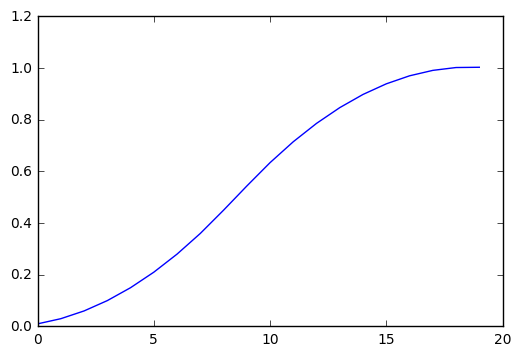

In [4]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

Last Parameter:	[  6.45248  -7.12624 -11.31836]
Last Reward: 	-26.2502473599


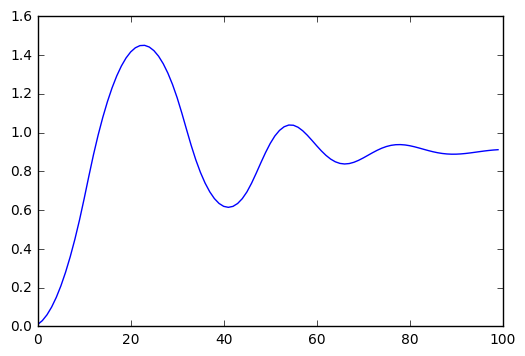

In [5]:
policy.setParameter(par)
trace, i, achieved = executer.rollout(policy)

print("Last Parameter:\t"+str(par))
print("Last Reward: \t"+str(sum([t[2] for t in trace])))

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [6]:
[t[0] for t in trace]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 array([ 0.50413]),
 array([-0.37274]),
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 array([-0.50521]),
 array([ 0.14871]),
 array([ 0.71802]),
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 array([ 0.67472]),
 array([ 0.2301]),
 array([-0.1806]),
 array([-0.53195]),
 array([-0.80562]),
 array([-0.9909]),
 -1.0,
 -1.0,
 -1.0,
 array([-0.93504]),
 array([-0.75464]),
 array([-0.54088]),
 array([-0.31278]),
 array([-0.0882]),
 array([ 0.11725]),
 array([ 0.29109]),
 array([ 0.4245]),
 array([ 0.51257]),
 array([ 0.55414]),
 array([ 0.55152]),
 array([ 0.50989]),
 array([ 0.43664]),
 array([ 0.34056]),
 array([ 0.23109]),
 array([ 0.11754]),
 array([ 0.00846]),
 array([-0.08887]),
 array([-0.16885]),
 array([-0.22775]),
 array([-0.26375]),
 array([-0.27688]),
 array([-0.26879]),
 array([-0.24247]),
 array([-0.20

In [7]:
par_policy = lambda par: (lambda x: np.exp(par[0] + par[1:].dot(x)) - 1)
policy = tools.Policy(par_policy,(3))
optimizer.reset()
par, conv = optimizer.optimize(policy)

Start Linear Finite Difference optimization:
Initial Parameters: [-0.76457 -0.07739  0.34679]
Run: 0  	Parameter: 	[-0.76457 -0.07739  0.34679]	Reward: -873.61067118
		Gradient: 	[ 11.9229  -13.89015  -2.30611]
Run: 10  	Parameter: 	[ 4.78803 -7.28977 -1.11928]	Reward: -54.2199722458
		Gradient: 	[-0.08031 -0.05651 -0.08673]
Run: 20  	Parameter: 	[ 4.50218 -7.49716 -1.58589]	Reward: -49.2637078298
		Gradient: 	[-0.03172 -0.03644 -0.09009]
Run: 30  	Parameter: 	[ 4.46593 -7.63676 -1.99856]	Reward: -47.5787127493
		Gradient: 	[ 0.00662 -0.01779 -0.07073]
Run: 40  	Parameter: 	[ 4.53922 -7.69037 -2.31824]	Reward: -46.375885591
		Gradient: 	[ 0.02006 -0.00868 -0.05917]
Run: 50  	Parameter: 	[ 4.63454 -7.74087 -2.61449]	Reward: -45.2953573131
		Gradient: 	[ 0.01854 -0.01035 -0.05891]
Run: 60  	Parameter: 	[ 4.72803 -7.78866 -2.90531]	Reward: -44.5594716635
		Gradient: 	[ 0.01917 -0.00669 -0.05756]
Run: 70  	Parameter: 	[ 4.83119 -7.81468 -3.1904 ]	Reward: -43.5832931664
		Gradient: 	[ 0.045

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


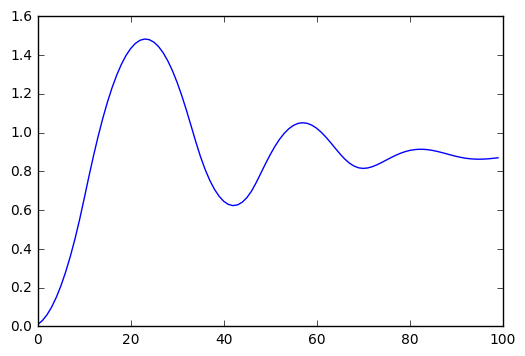

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()